In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from utils import ConvexPolygon, SimpleRandomConvexSet, rotation


def create_realization(first_vertex) -> ConvexPolygon:
    """
    Create a realization of a random equilateral triangle (see the first example in the paper).

    Parameters
    ----------
    first_vertex : tuple of float
        The [x, y] coordinates of the first vertex of the equilateral triangle.

    Returns
    -------
    ConvexPolygon
        A convex polygon representing an equilateral triangle with vertices at:
        1. first_vertex
        2. first_vertex rotated by 120° (2π/3 radians)
        3. first_vertex rotated by 240° (4π/3 radians)
    """
    second = rotation(*first_vertex, 2 * np. pi / 3)
    third = rotation(*first_vertex, 4 * np.pi / 3)
    return ConvexPolygon([first_vertex, second, third])

In [5]:
# defining triangles as convex polygons
sets = [create_realization((np.cos(angle), np.sin(angle))) for angle in np.pi * np.array([-1 / 3, -1 / 2, -2 / 3, -5 / 6])]

# defining simple random set with different probability distributions
RS_unif = SimpleRandomConvexSet(sets, [0.25, 0.25, 0.25, 0.25])
RS_2224 = SimpleRandomConvexSet(sets, [0.2, 0.2, 0.2, 0.4])
RS_1117 = SimpleRandomConvexSet(sets, [0.1, 0.1, 0.1, 0.7])

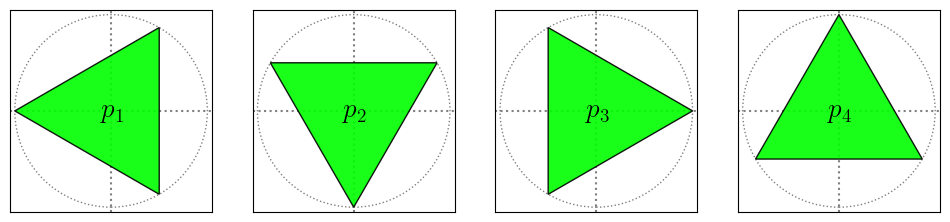

In [6]:
# graphical output - description of the random set
fig, ax = plt.subplots(1,4, figsize=(12,3))
for i in range(4):
    plt.setp(ax[i], aspect="equal", xlim=(-1.05,1.05), ylim=(-1.05,1.05), xticks=[], yticks=[])
    ax[i].add_patch(patch.Polygon(sets[i].points, fc="lime", ec="black", alpha=0.9))
    ax[i].add_patch(patch.Circle((0, 0), 1, fill=False, ec="black", zorder=0, ls=":", alpha=0.5))
    ax[i].text(0,0,f"$p_{i+1}$", va="center", ha="center", usetex=True, fontsize=20)
    ax[i].axhline(zorder=0, color="black", alpha=0.5, ls=":")
    ax[i].axvline(zorder=0, color="black", alpha=0.5, ls=":")

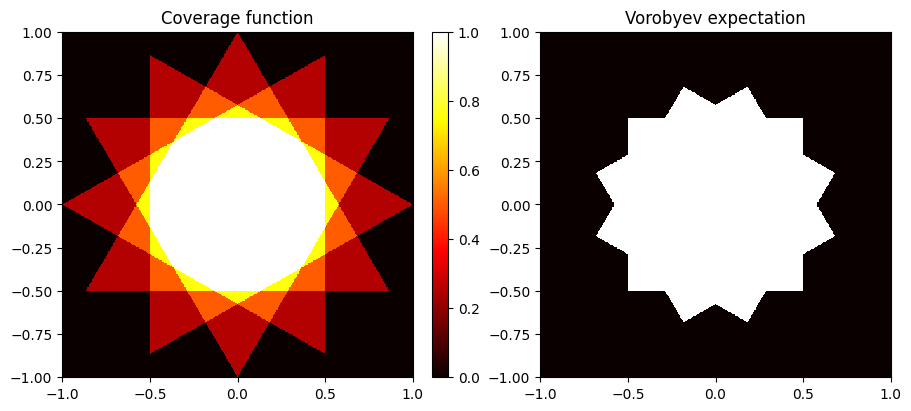

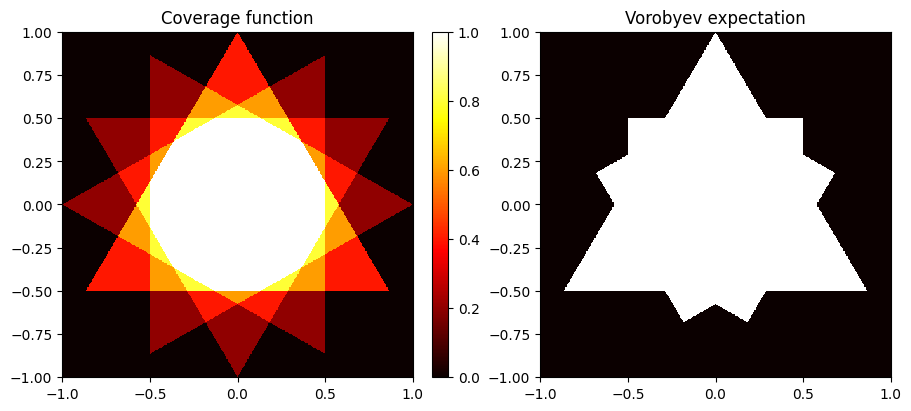

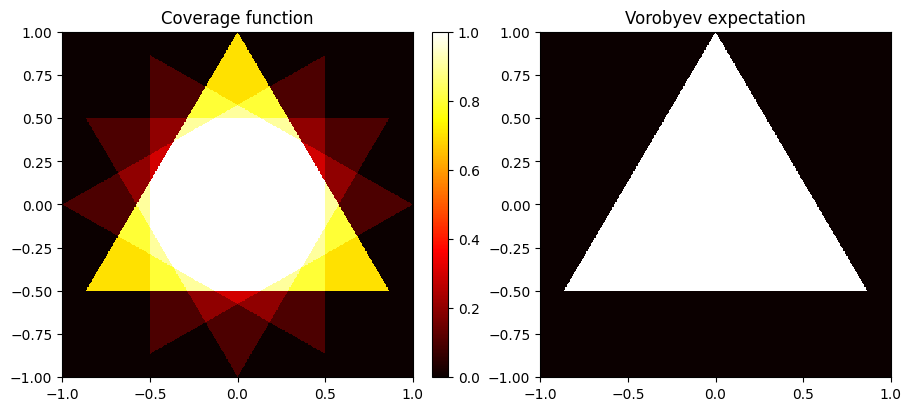

In [4]:
# Computing Vorobyev expectation (discretization on the grid with resolution 500x500)
# WARNING, computation might take longer
for random_set in [RS_unif,RS_2224,RS_1117]:
    random_set.vorobyev_sim(500, 500, (-1,1), (-1,1))

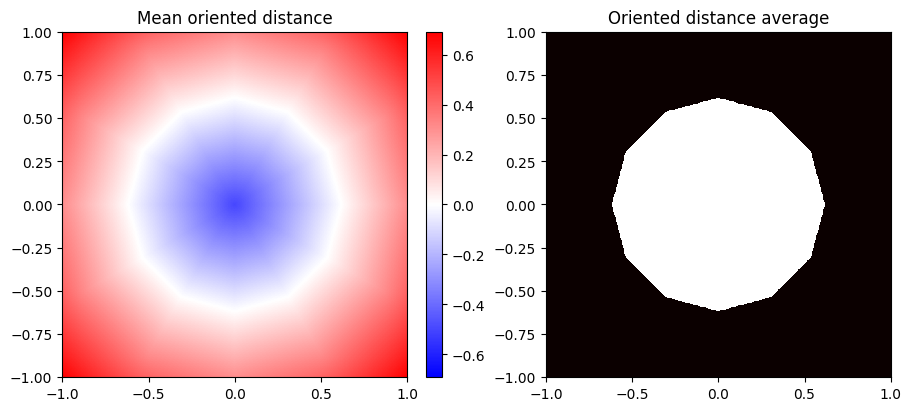

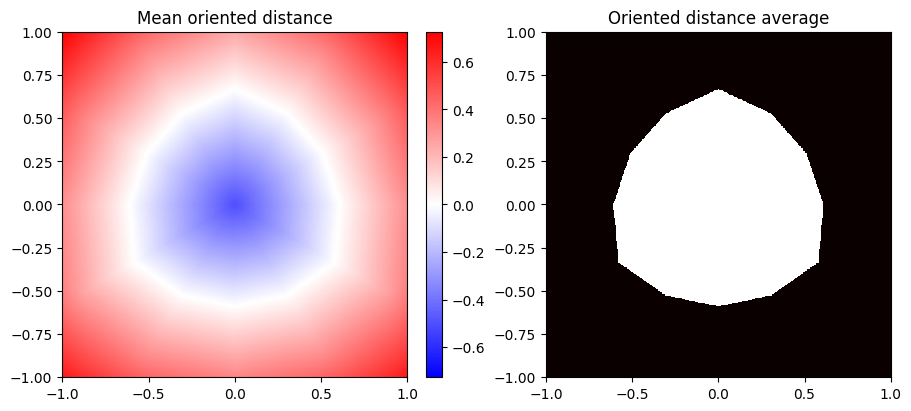

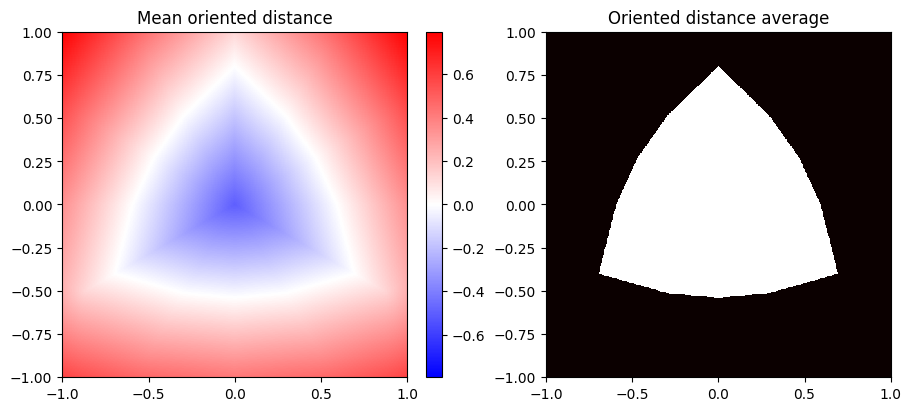

In [5]:
# Computing ODA expectation (discretization on the grid with resolution 500x500)
# WARNING, computation might take longer
for random_set in [RS_unif,RS_2224,RS_1117]:
    random_set.oda_sim(500, 500, (-1,1), (-1,1))

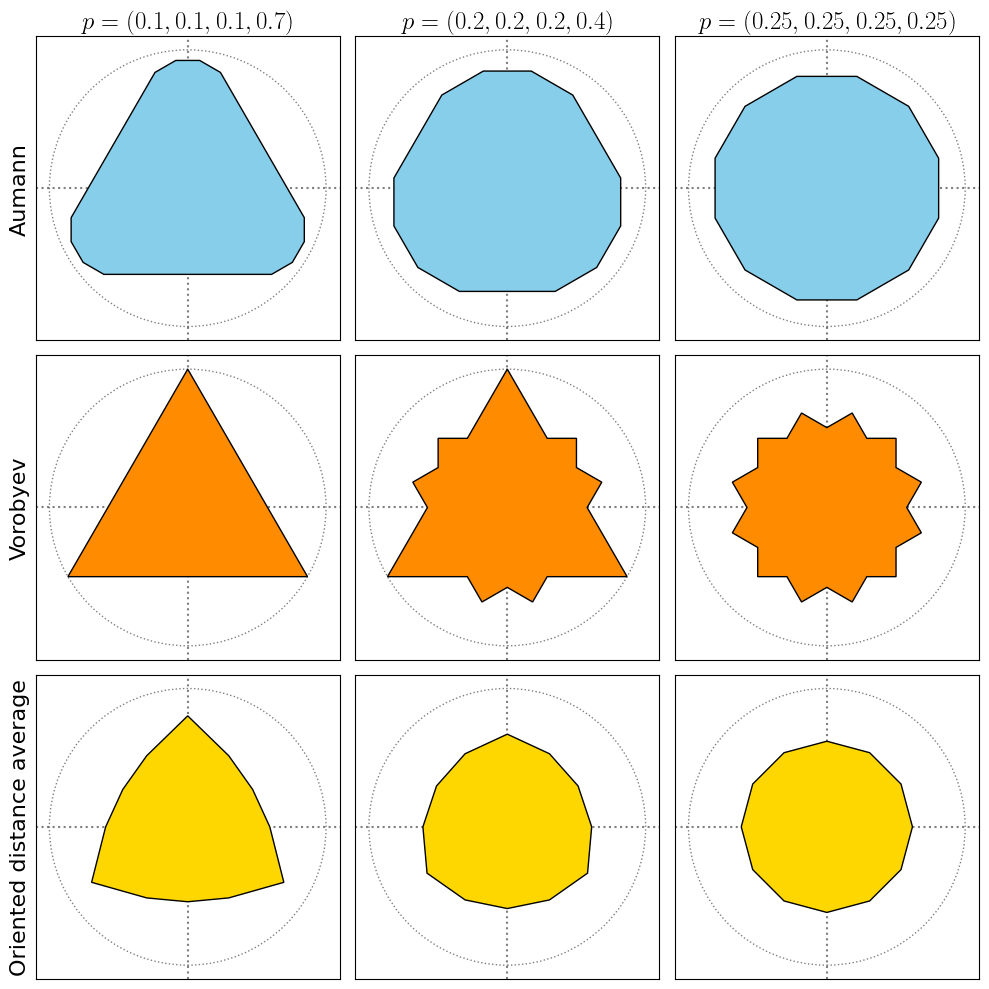

In [5]:
# graphical comparison of all expectations

fig,ax = plt.subplots(3, 3, figsize=(10,10))

with open("Example1_data.json", "r") as f:
    data = json.load(f)

expectations = [
    [RS_1117.aumann().points, RS_2224.aumann().points, RS_unif.aumann().points],
    [data["vorobyev_1117"], data["vorobyev_2224"], data["vorobyev_unif"]],
    [data["oda_1117"], data["oda_2224"], data["oda_unif"]]
]

colors = ["skyblue", "darkorange", "gold"]
names = ["Aumann", "Vorobyev", "Oriented distance average"]
probs_text = ["$p=(0.1, 0.1, 0.1, 0.7)$", "$p=(0.2, 0.2, 0.2, 0.4)$", "$p=(0.25, 0.25, 0.25, 0.25)$"]
for r in range(3):
    for c in range(3):
        plt.setp(ax[r][c], aspect="equal", xlim=(-1.1,1.1), ylim=(-1.1,1.1), xticks=[], yticks=[])
        ax[r][c].add_patch(patch.Polygon(expectations[r][c], fc=colors[r], ec="black"))
        ax[r][c].add_patch(patch.Circle((0, 0), 1, fill=False, ec="black", zorder=0, ls=":", alpha=0.5))
        ax[r][c].axhline(zorder=0, color="black", alpha=0.5, ls=":")
        ax[r][c].axvline(zorder=0, color="black", alpha=0.5, ls=":")

        if c==0:
            ax[r][c].set_ylabel(names[r], fontsize=16)
        if r==0:
            ax[r][c].set_title(probs_text[c], fontsize=18, usetex=True)

plt.tight_layout()
plt.show()